In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import scanpy.plotting as scp
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

TREATED_LABEL = "treated"

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.19 numpy==1.17.0 scipy==1.2.1 pandas==0.25.0 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
filename = "tgfb1-5-" + TREATED_LABEL + ".h5ad"
filename = os.path.join("write", filename)
adata = anndata.read(filename)

In [3]:
adata

AnnData object with n_obs × n_vars = 7441 × 4542 
    obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature', 'fibroblast signature', 'ALK5 signature', 'ALK1 signature'
    var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [4]:
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=True, vector_friendly=True, fontsize=14, color_map=None, format='pdf', transparent=False, ipython_format='png2x')

In [5]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fa"
    finished (0:06:01.08) --> added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm)


In [6]:
sc.tl.paga(adata, groups='louvain')

running PAGA
    finished (0:00:00.34) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


/home/ubuntu/.local/lib/python3.6/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):


--> added 'pos', the PAGA positions (adata.uns['paga'])


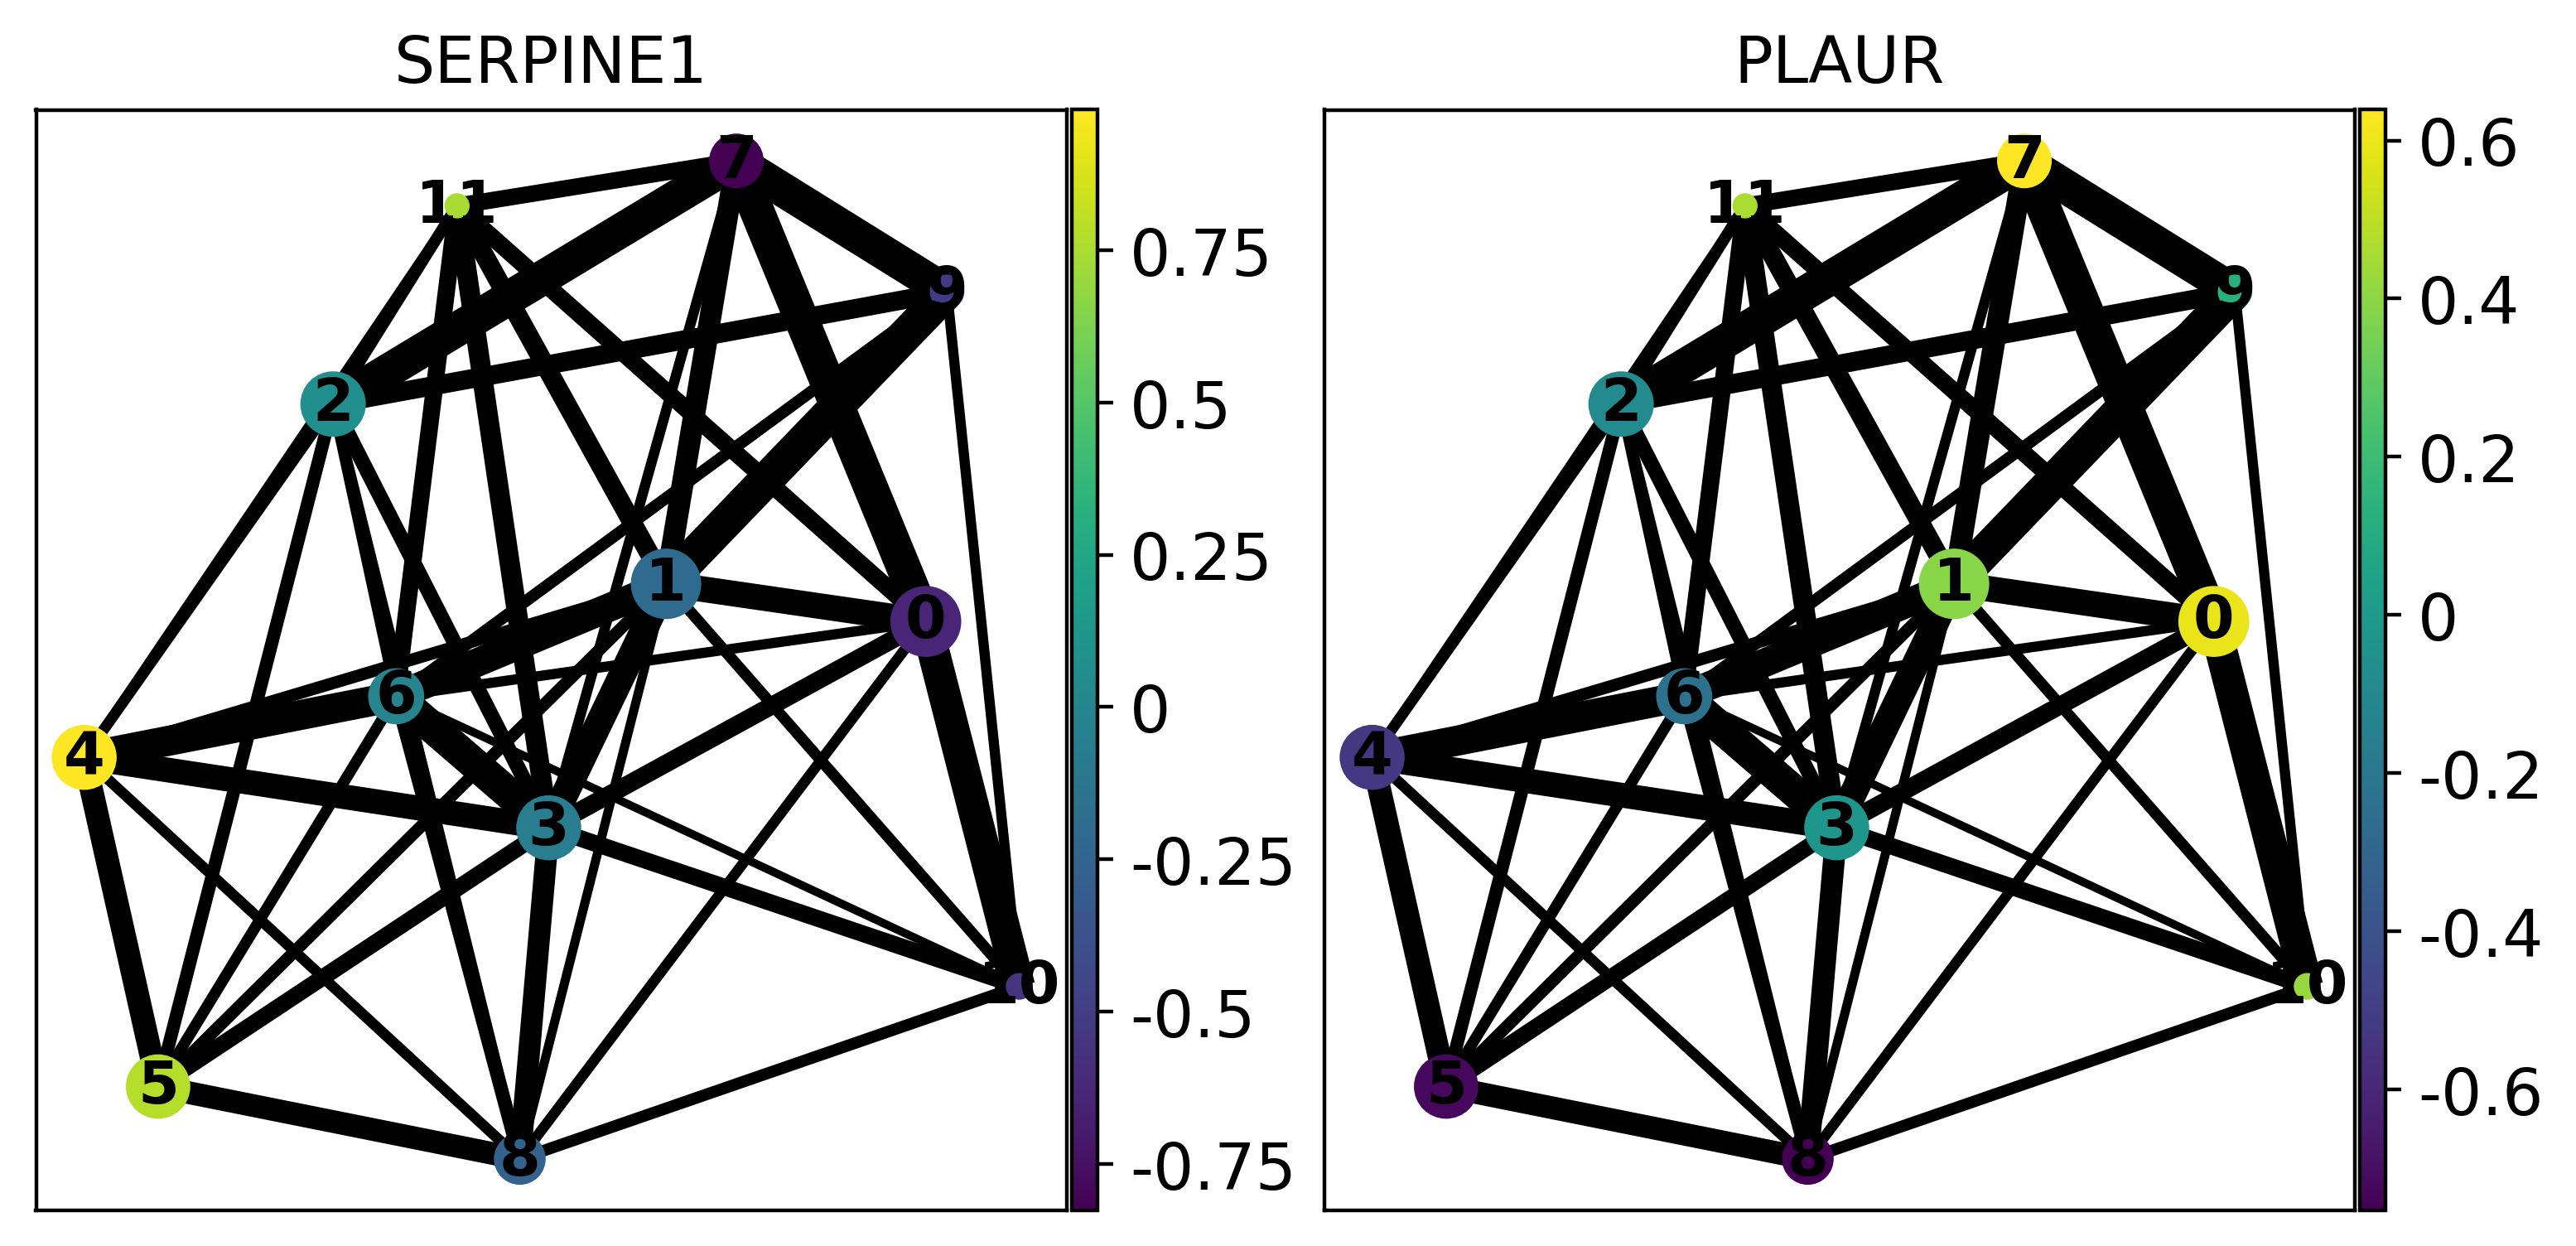

In [7]:
sc.pl.paga(adata, color=['SERPINE1', 'PLAUR'], threshold=0.2)